<a href="https://colab.research.google.com/github/MikeIV2007/Data-science-HW/blob/main/DS_HW_02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Частина перша: Знайомство з Pandas.**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [37]:
# First option

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, thousands=".")
print(f"Number of tables found: {len(tables)}\n")

first_table_cell = "Регіон"

try:
    desired_tables = [table for table in tables if first_table_cell in str(table.columns)]
    desired_table = desired_tables[0]
    print(f"Table 'Коефіцієнт народжуваності в регіонах України (1950—2019)' found:\n")

except:
    print(f"No table with title 'Коефіцієнт народжуваності в регіонах України (1950—2019)' found on the webpage.")


Number of tables found: 77

Table 'Коефіцієнт народжуваності в регіонах України (1950—2019)' found:



In [38]:
# Second option

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
try:
    data = pd.read_html(URL, match=TABLE_NAME, thousands=".")
    desired_table = data[0]

except:
    print(f"No table with title 'Коефіцієнт народжуваності в регіонах України (1950—2019)' found on the webpage.")

In [40]:
# Вивести перші рядки таблиці за допомогою методу head

desired_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",—,—
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",—


In [41]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

desired_table.shape

(28, 9)

In [42]:
# Замініть у таблиці значення "—" на значення NaN

desired_table.replace('—', np.nan, inplace=True)
desired_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",NaN,NaN
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",NaN


In [43]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

desired_table.dtypes

Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

In [44]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

for col in desired_table.columns[1:]:
    desired_table[col] = desired_table[col].str.replace(',', '.').astype(float)
desired_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [45]:
desired_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [46]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

for col in desired_table.columns[1:]:
    df=desired_table[col].isnull()
    spaces = df.sum()
    all_elements = len(df)
    missing_percentage = (spaces / all_elements) * 100
    print (f'In the column {df.name} prisentage of spaces is: {missing_percentage}')



In the column 1950 prisentage of spaces is: 7.142857142857142
In the column 1960 prisentage of spaces is: 3.571428571428571
In the column 1970 prisentage of spaces is: 3.571428571428571
In the column 1990 prisentage of spaces is: 0.0
In the column 2000 prisentage of spaces is: 0.0
In the column 2012 prisentage of spaces is: 0.0
In the column 2014 prisentage of spaces is: 7.142857142857142
In the column 2019 prisentage of spaces is: 14.285714285714285


In [48]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці

desired_table = desired_table.drop(desired_table.index[-1])
desired_table.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
23,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


In [49]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

for col in desired_table.columns[1:]:
    df=desired_table[col]
    df.fillna(df.mean(), inplace=True)
desired_table.head(28)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


In [50]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

df = desired_table.copy()
mean_birth_rate_2019 = df['2019'].mean()

regions_higher_than_mean = df[df['2019'] > mean_birth_rate_2019]['Регіон'].tolist()

print("Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:")
print(regions_higher_than_mean)


Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [51]:
# У якому регіоні була найвища народжуваність у 2014 році?

df = desired_table.copy()
max_birth_rate_2014 = df[df['2014'] == df['2014'].max()]
region_highest_birth_rate_2014 = max_birth_rate_2014['Регіон'].values[0]
print(f"Регіон з найвищою народжуваністю у 2014 році: {region_highest_birth_rate_2014}")

Регіон з найвищою народжуваністю у 2014 році: Рівненська


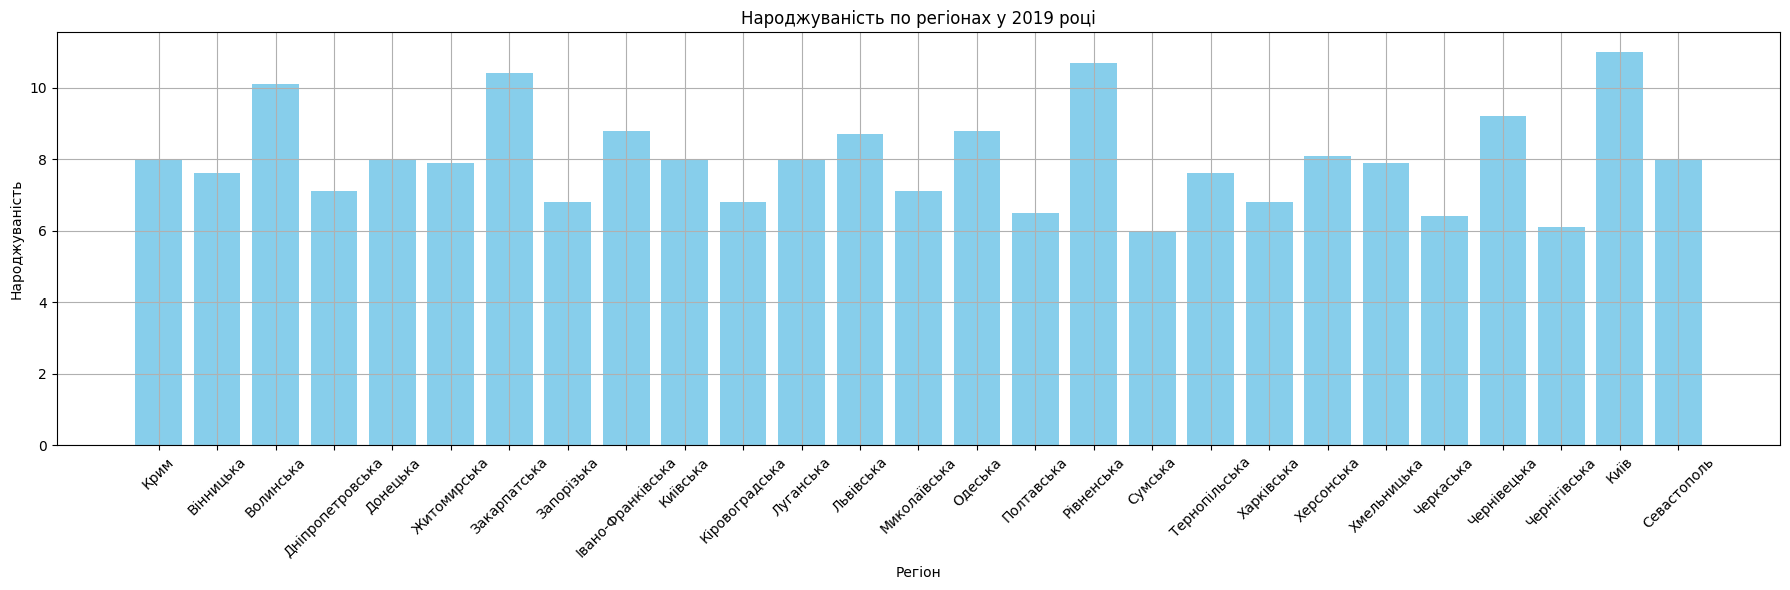

In [52]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

df = desired_table.copy()

plt.figure(figsize=(18, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()